In [21]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc as calc_auc, precision_recall_curve, average_precision_score
import random
import glob
import ngsci
import hydra
import h5py
import torch.nn.functional as F
from omegaconf import OmegaConf
from omegaconf import DictConfig
from sklearn.model_selection import StratifiedKFold

In [24]:
def plot_roc_pr(y_true, y_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    
    fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
    roc_auc = roc_auc_score(y_true, y_pred[:, 1])
    
    ax1.plot(fpr, tpr, '-', label='ROC AUC: %.4f, Label: %d' % (roc_auc, 1))
    ax1.set_title('ROC Curve')
    ax1.legend()
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')

    precision, recall, _ = precision_recall_curve(y_true, y_pred[:, 1])
    pr_auc = average_precision_score(y_true, y_pred[:, 1])
    
    ax2.plot(recall, precision, '-', label='PR AUC: %.4f, Label: %d' % (pr_auc, 1))
    ax2.set_title('Precision-Recall Curve')
    ax2.legend()
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')

    plt.tight_layout()
    plt.show()

    return roc_auc, pr_auc

In [25]:
tb_df_local_test = pd.read_csv('/home/ngsci/project/tuberculosis_detection/cv_splits/test_split_stratified.csv')
tb_df_local_test.sort_values('image', inplace=True)

tb_df_local_test.shape

(9386, 4)

# check fusion model - local test

In [26]:
base_path = "/home/ngsci/project/tuberculosis_detection/04_prediction/transformer_on_embeddings_bag/"

In [27]:
# SMALL CLS RUN_5
pred_small_cls_run_5 = np.load(base_path + \
"dinov2-vit-small_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_dinov2-vit-small_run_5_10fold_local_test.npy")

final_pred_small_cls_run_5 = np.mean(pred_small_cls_run_5, axis=0)

pred_small_cls_run_5_holdout = np.load(base_path + \
"dinov2-vit-small_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_dinov2-vit-small_run_5_10fold_holdout.npy")

final_pred_small_cls_run_5_holdout = np.mean(pred_small_cls_run_5_holdout, axis=0)

In [35]:
# UNI CLS RUN_2
pred_uni_cls_run_2 = np.load(base_path + \
"uni_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_uni_run_2_10fold_local_test.npy")

final_pred_uni_cls_run_2 = np.mean(pred_uni_cls_run_2, axis=0)

pred_uni_cls_run_2_holdout = np.load(base_path + \
"uni_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_uni_run_2_10fold_holdout.npy")

final_pred_uni_cls_run_2_holdout = np.mean(pred_uni_cls_run_2_holdout, axis=0)

In [37]:
# UNI CLS RUN_4_SQRT_SAMPLING
pred_uni_cls_run_4_sqrt_sampling = np.load(base_path + \
"uni_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_uni_run_4_sqrt_sampling_10fold_local_test.npy")

final_pred_uni_cls_run_4_sqrt_sampling  = np.mean(pred_uni_cls_run_4_sqrt_sampling , axis=0)

pred_uni_cls_run_4_sqrt_sampling_holdout = np.load(base_path + \
"uni_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_uni_run_4_sqrt_sampling_10fold_holdout.npy")

final_pred_uni_cls_run_4_sqrt_sampling_holdout = np.mean(pred_uni_cls_run_4_sqrt_sampling_holdout, axis=0)

In [38]:
# HIPT STAGE3 UNI CLS RUN_1
pred_uni_hipt_stage3_run_1 = np.load(
"/home/ngsci/project/tuberculosis_detection/04_prediction/hipt_stage3_on_embeddings_bag/uni_224_224_patches/preds_100ensemble_hipt_stage3_on_embeddings_bag_uni_run_1_local_test.npy")

final_pred_uni_hipt_stage3_run_1   = np.mean(pred_uni_hipt_stage3_run_1  , axis=0)

pred_uni_hipt_stage3_run_1_holdout = np.load(
"/home/ngsci/project/tuberculosis_detection/04_prediction/hipt_stage3_on_embeddings_bag/uni_224_224_patches/preds_100ensemble_hipt_stage3_on_embeddings_bag_uni_run_1_holdout.npy")

final_pred_uni_hipt_stage3_run_1_holdout   = np.mean(pred_uni_hipt_stage3_run_1_holdout  , axis=0)

In [39]:
# LARGE AND UNI CLS RUN_1 MULTI BRANCH
pred_large_and_uni_cls_run_1 = np.load(
"/home/ngsci/project/tuberculosis_detection/04_prediction/transformer_on_embeddings_bag/dinov2-vit-large_and_uni_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_dinov2-vit-large_and_uni_run_1_10fold_local_test.npy")

final_pred_large_and_uni_cls_run_1   = np.mean(pred_large_and_uni_cls_run_1  , axis=0)

pred_large_and_uni_cls_run_1_holdout = np.load(
"/home/ngsci/project/tuberculosis_detection/04_prediction/transformer_on_embeddings_bag/dinov2-vit-large_and_uni_224_224_patches_cls/preds_100ensemble_transformer_cls_on_embeddings_bag_dinov2-vit-large_and_uni_run_1_10fold_holdout.npy")

final_pred_large_and_uni_cls_run_1_holdout   = np.mean(pred_large_and_uni_cls_run_1_holdout  , axis=0)

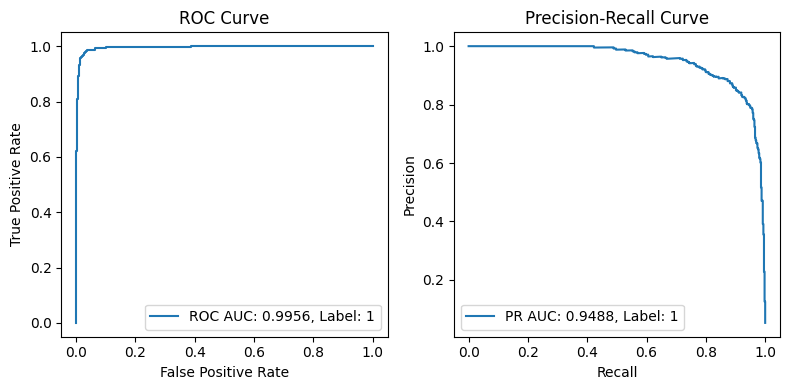

ROC-AUC: 0.9956327004664955
PR-AUC:  0.9487644929319781


In [29]:
pred_fusion = (
               final_pred_uni_cls_run_2
)
pred_fusion /= pred_fusion.shape[0]

rocauc, prauc = plot_roc_pr( tb_df_local_test.tb_positive.values, pred_fusion  )
print(f"ROC-AUC: {rocauc}\nPR-AUC:  {prauc}")

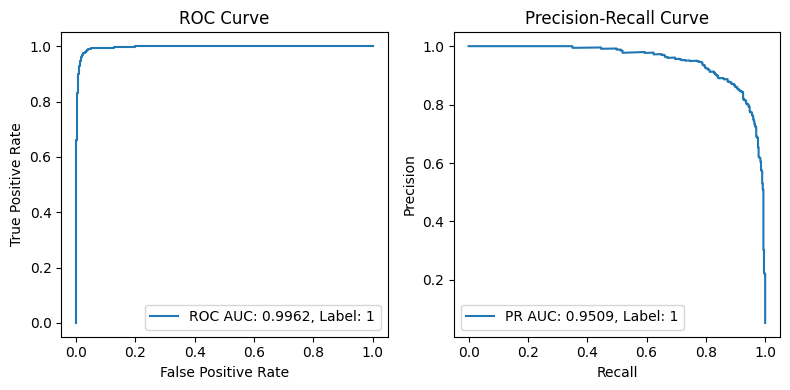

ROC-AUC: 0.9962071902672646
PR-AUC:  0.9509213992320109


In [31]:
pred_fusion = (
               final_pred_uni_cls_run_2 +\
               final_pred_uni_hipt_stage3_run_1 +\
               final_pred_uni_cls_run_4_sqrt_sampling +\
               final_pred_small_cls_run_5
               
)
pred_fusion_final = pred_fusion / pred_fusion.shape[0]

rocauc, prauc = plot_roc_pr( tb_df_local_test.tb_positive.values, pred_fusion_final  )
print(f"ROC-AUC: {rocauc}\nPR-AUC:  {prauc}")

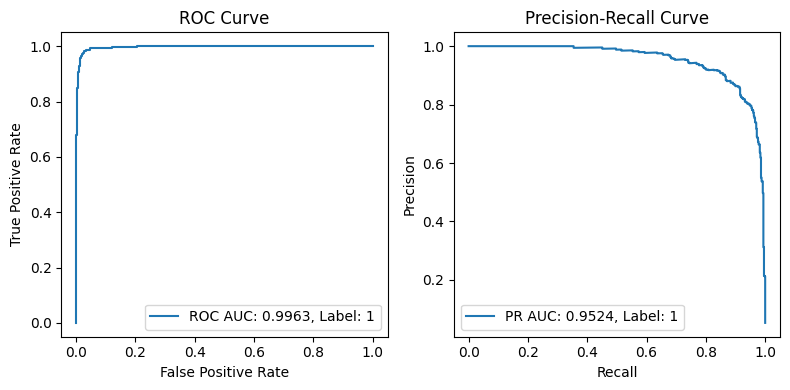

ROC-AUC: 0.9962746441524611
PR-AUC:  0.9523974140095557


In [40]:
pred_fusion = (
               final_pred_uni_cls_run_2 +\
               final_pred_uni_hipt_stage3_run_1 +\
               final_pred_uni_cls_run_4_sqrt_sampling +\
               final_pred_small_cls_run_5 +\
               final_pred_large_and_uni_cls_run_1
               
)
pred_fusion_final = pred_fusion / pred_fusion.shape[0]

rocauc, prauc = plot_roc_pr( tb_df_local_test.tb_positive.values, pred_fusion_final  )
print(f"ROC-AUC: {rocauc}\nPR-AUC:  {prauc}")

### Check best ensemble possible

#### only on the test set

In [41]:
allpreds = np.concatenate(( 
           pred_uni_cls_run_2,
           pred_uni_hipt_stage3_run_1,
           pred_uni_cls_run_4_sqrt_sampling,
           pred_small_cls_run_5,
           pred_large_and_uni_cls_run_1
            ), axis=0)
allpreds.shape

(500, 9386, 2)

In [42]:
allpreds_holdout = np.concatenate(( 
           pred_uni_cls_run_2_holdout,
           pred_uni_hipt_stage3_run_1_holdout,
           pred_uni_cls_run_4_sqrt_sampling_holdout,
           pred_small_cls_run_5_holdout,
           pred_large_and_uni_cls_run_1_holdout
            ), axis=0)
allpreds_holdout.shape

(500, 25027, 2)

In [43]:
def forward_selection_pr_auc(pred, true_labels):
    n_models = pred.shape[0]
    selected_models = []
    best_pr_auc = 0
    improvement = True

    while improvement and len(selected_models) < n_models:
        improvement = False
        best_model_for_this_round = None

        for i in range(n_models):
            if i in selected_models:
                continue

            tentative_selected = selected_models + [i]
            ensemble_pred = np.mean(pred[tentative_selected], axis=0)[:, 1]
            
            pr_auc = average_precision_score(true_labels, ensemble_pred)
            
            if pr_auc > best_pr_auc:
                best_pr_auc = pr_auc
                best_model_for_this_round = i
                improvement = True

        if improvement and best_model_for_this_round is not None:
            selected_models.append(best_model_for_this_round)
            print(f"Model {best_model_for_this_round} added, New Best PR AUC: {best_pr_auc}")

    return selected_models

In [44]:
# Assuming pred and true_labels are defined
# pred: Prediction array of shape (100, 9386, 2), for 100 models
# true_labels: Array of true binary labels of shape (9386,)

# Running the forward selection with PR AUC
selected_models = forward_selection_pr_auc(allpreds, tb_df_local_test.tb_positive.values)
print(f"Selected Models: {selected_models}")

Model 10 added, New Best PR AUC: 0.9410568877813175
Model 151 added, New Best PR AUC: 0.9509879467740688
Model 267 added, New Best PR AUC: 0.9530210663950045
Model 307 added, New Best PR AUC: 0.9562979483011892
Model 146 added, New Best PR AUC: 0.9568732640924605
Model 402 added, New Best PR AUC: 0.9572368910413269
Model 466 added, New Best PR AUC: 0.9578617211447484
Model 59 added, New Best PR AUC: 0.9580702121776313
Model 486 added, New Best PR AUC: 0.9581914624557928
Model 271 added, New Best PR AUC: 0.9584655070626381
Model 135 added, New Best PR AUC: 0.958715550067951
Model 327 added, New Best PR AUC: 0.9588033350956443
Model 268 added, New Best PR AUC: 0.9590409140476461
Model 123 added, New Best PR AUC: 0.9592175740592097
Model 441 added, New Best PR AUC: 0.9593482111138079
Model 184 added, New Best PR AUC: 0.9595049076375874
Model 17 added, New Best PR AUC: 0.9595482997444373
Model 99 added, New Best PR AUC: 0.9596351855816487
Model 400 added, New Best PR AUC: 0.959660371914573

In [45]:
 average_precision_score(tb_df_local_test.tb_positive.values, np.mean( allpreds[selected_models], axis=0 )[:,1] )

0.9596603719145733

In [48]:
selected_models = np.array(selected_models)

In [ ]:
# without multi: 0.9582082600213918

In [49]:
allpreds[selected_models].shape

(19, 9386, 2)

In [50]:
allpreds_holdout[selected_models].shape

(19, 25027, 2)

In [52]:
final_allpreds = np.mean(allpreds[selected_models], axis=0)
final_allpreds.shape

(9386, 2)

In [53]:
final_allpreds_holdout = np.mean(allpreds_holdout[selected_models], axis=0)
final_allpreds_holdout.shape

(25027, 2)

In [54]:
(np.argmax(final_allpreds_holdout,1) > 0).sum() / final_allpreds_holdout.shape[0]

0.06145363007951413

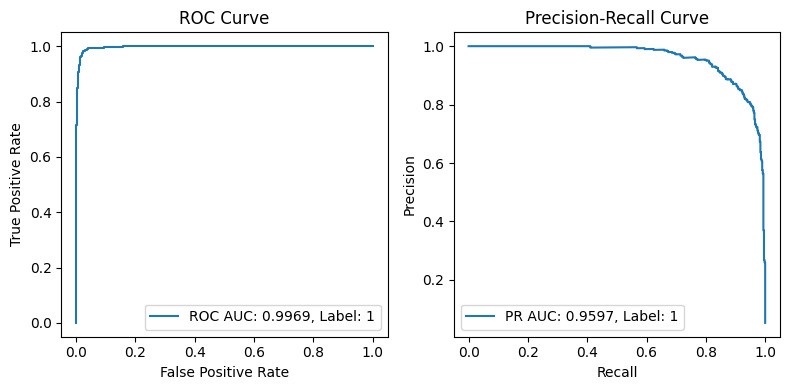

ROC-AUC: 0.9969306218682327
PR-AUC:  0.9596603719145733


In [55]:
rocauc, prauc = plot_roc_pr( tb_df_local_test.tb_positive.values, final_allpreds  )
print(f"ROC-AUC: {rocauc}\nPR-AUC:  {prauc}")

In [56]:
tb_df_holdout = pd.read_csv("/home/ngsci/datasets/tb-wellgen-smear/supplementary/contest/tb-holdout-manifest.csv")

prediction_df = tb_df_holdout[["image_id"]].copy()
prediction_df["prob"] = final_allpreds_holdout[:,1]

In [58]:
filepath = "/home/ngsci/project/tuberculosis_detection/submissions/submission_26_preds_19ensemble_small_cls_run_5_uni_cls_run_2_uni_cls_run_4_sqrt_uni_mil_run_1_large_and_uni_cls_run_1_10fold_model_selection_rocauc_0.9969_prauc_0.9596.csv"
prediction_df.to_csv(filepath, index=False, header=False)

#### with 5-fold stratified CV

In [48]:
def forward_selection_stratified_cv(pred, true_labels, n_splits=5, random_state=None):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    selected_models_over_folds = []

    for fold, (train_index, test_index) in enumerate(skf.split(np.zeros(len(true_labels)), true_labels)):
        selected_models = []
        best_pr_auc = 0
        improvement = True
        n_models = pred.shape[0]

        while improvement and len(selected_models) < n_models:
            improvement = False
            best_model_for_this_round = None

            for i in range(n_models):
                if i in selected_models:
                    continue

                tentative_selected = selected_models + [i]
                ensemble_pred = np.mean(pred[tentative_selected], axis=0)[:, 1][test_index]  # Get predictions for validation fold
                
                pr_auc = average_precision_score(true_labels[test_index], ensemble_pred)
                
                if pr_auc > best_pr_auc:
                    best_pr_auc = pr_auc
                    best_model_for_this_round = i
                    improvement = True

            if improvement and best_model_for_this_round is not None:
                selected_models.append(best_model_for_this_round)

        selected_models_over_folds.append(selected_models)

    all_selected_models = set(model for models in selected_models_over_folds for model in models)
    return list(all_selected_models)

In [49]:
# Running the forward selection with 5-fold cross-validation
selected_models = forward_selection_stratified_cv(allpreds, tb_df_local_test.tb_positive.values,
                                       n_splits=5, random_state=42)
print(f"Selected Models across folds: {selected_models}")

Selected Models across folds: [128, 257, 386, 135, 263, 265, 10, 269, 398, 16, 146, 404, 24, 281, 412, 284, 158, 159, 160, 417, 295, 307, 184, 441, 63, 69, 198, 327, 455, 329, 335, 208, 214, 86, 473, 247, 93, 223, 354, 100, 230, 231, 358, 364, 366, 110, 369, 497, 116, 119, 123, 254]


In [50]:
average_precision_score(tb_df_local_test.tb_positive.values, np.mean( allpreds[selected_models], axis=0 )[:,1] )

0.9564334365241444

In [ ]:
# without multi: 0.9552836868472214

In [51]:
len(selected_models)

52

### with 5-fold stratified CV - multiple runs

In [52]:
selected_models_all = []
avg_prauc_all = []

for run_idx in tqdm(range(150)):

    # Running the forward selection with 5-fold cross-validation
    selected_models = forward_selection_stratified_cv(allpreds, tb_df_local_test.tb_positive.values,
                                           n_splits=5, random_state=run_idx)
    
    avg_prauc = average_precision_score(tb_df_local_test.tb_positive.values, np.mean( allpreds[selected_models], axis=0 )[:,1] )
    
    print("AVG PR-AUC: ", avg_prauc)
    avg_prauc_all.append(avg_prauc)
    
    selected_models_all.append(selected_models)

  1%|          | 1/150 [00:21<53:55, 21.72s/it]

AVG PR-AUC:  0.9565171906331542


  1%|▏         | 2/150 [00:46<57:42, 23.39s/it]

AVG PR-AUC:  0.9550009413505771


  2%|▏         | 3/150 [01:12<1:00:42, 24.78s/it]

AVG PR-AUC:  0.9561727228950706


  3%|▎         | 4/150 [01:38<1:01:11, 25.15s/it]

AVG PR-AUC:  0.9555926168804989


  3%|▎         | 5/150 [01:55<54:02, 22.37s/it]  

AVG PR-AUC:  0.9529752986241153


  4%|▍         | 6/150 [02:27<1:01:34, 25.66s/it]

AVG PR-AUC:  0.9558063126039186


  5%|▍         | 7/150 [02:51<59:50, 25.11s/it]  

AVG PR-AUC:  0.9560208927255247


  5%|▌         | 8/150 [03:18<1:00:13, 25.45s/it]

AVG PR-AUC:  0.9555422029528408


  6%|▌         | 9/150 [03:43<59:46, 25.44s/it]  

AVG PR-AUC:  0.954523218431811


  7%|▋         | 10/150 [04:02<54:37, 23.41s/it]

AVG PR-AUC:  0.9562236749343408


  7%|▋         | 11/150 [04:30<57:23, 24.77s/it]

AVG PR-AUC:  0.9563736464954233


  8%|▊         | 12/150 [04:55<57:02, 24.80s/it]

AVG PR-AUC:  0.9558088314842192


  9%|▊         | 13/150 [05:19<56:42, 24.84s/it]

AVG PR-AUC:  0.9556696197005183


  9%|▉         | 14/150 [05:46<57:07, 25.20s/it]

AVG PR-AUC:  0.956326918316597


 10%|█         | 15/150 [06:12<57:49, 25.70s/it]

AVG PR-AUC:  0.9564352115629875


 11%|█         | 16/150 [06:29<51:28, 23.05s/it]

AVG PR-AUC:  0.9556874131771314


 11%|█▏        | 17/150 [06:51<49:53, 22.51s/it]

AVG PR-AUC:  0.9563180662201574


 12%|█▏        | 18/150 [07:14<50:04, 22.76s/it]

AVG PR-AUC:  0.9552216802471408


 13%|█▎        | 19/150 [07:40<51:56, 23.79s/it]

AVG PR-AUC:  0.9557679819883891


 13%|█▎        | 20/150 [08:09<54:46, 25.28s/it]

AVG PR-AUC:  0.9547809038423858


 14%|█▍        | 21/150 [08:30<51:47, 24.09s/it]

AVG PR-AUC:  0.9548744876504017


 15%|█▍        | 22/150 [08:58<53:43, 25.18s/it]

AVG PR-AUC:  0.9555031360322339


 15%|█▌        | 23/150 [09:22<52:34, 24.84s/it]

AVG PR-AUC:  0.9554470049291428


 16%|█▌        | 24/150 [09:45<50:54, 24.24s/it]

AVG PR-AUC:  0.953788455829574


 17%|█▋        | 25/150 [10:08<49:37, 23.82s/it]

AVG PR-AUC:  0.9556890186811668


 17%|█▋        | 26/150 [10:34<50:33, 24.46s/it]

AVG PR-AUC:  0.9560349651365899


 18%|█▊        | 27/150 [10:58<50:06, 24.44s/it]

AVG PR-AUC:  0.9564772286736716


 19%|█▊        | 28/150 [11:23<50:00, 24.59s/it]

AVG PR-AUC:  0.9555177322859848


 19%|█▉        | 29/150 [11:48<49:52, 24.73s/it]

AVG PR-AUC:  0.9560166589786248


 20%|██        | 30/150 [12:09<47:10, 23.59s/it]

AVG PR-AUC:  0.9543868851944732


 21%|██        | 31/150 [12:34<47:43, 24.06s/it]

AVG PR-AUC:  0.9557810195204685


 21%|██▏       | 32/150 [13:05<51:17, 26.08s/it]

AVG PR-AUC:  0.9565039759305062


 22%|██▏       | 33/150 [13:28<49:19, 25.30s/it]

AVG PR-AUC:  0.9553501453754516


 23%|██▎       | 34/150 [13:52<47:55, 24.79s/it]

AVG PR-AUC:  0.9549948261958371


 23%|██▎       | 35/150 [14:21<49:59, 26.08s/it]

AVG PR-AUC:  0.9556477459769428


 24%|██▍       | 36/150 [14:44<47:58, 25.25s/it]

AVG PR-AUC:  0.9561997668778687


 25%|██▍       | 37/150 [15:11<48:10, 25.58s/it]

AVG PR-AUC:  0.9560670295984387


 25%|██▌       | 38/150 [15:33<45:55, 24.60s/it]

AVG PR-AUC:  0.9557659147050391


 26%|██▌       | 39/150 [15:59<46:20, 25.05s/it]

AVG PR-AUC:  0.9566203321079921


 27%|██▋       | 40/150 [16:15<41:08, 22.44s/it]

AVG PR-AUC:  0.9553047234793405


 27%|██▋       | 41/150 [16:37<40:21, 22.22s/it]

AVG PR-AUC:  0.9556441144444521


 28%|██▊       | 42/150 [16:57<38:31, 21.40s/it]

AVG PR-AUC:  0.9557165484383687


 29%|██▊       | 43/150 [17:21<39:59, 22.43s/it]

AVG PR-AUC:  0.9564334365241444


 29%|██▉       | 44/150 [17:40<37:46, 21.38s/it]

AVG PR-AUC:  0.9552328510974513


 30%|███       | 45/150 [18:09<41:21, 23.63s/it]

AVG PR-AUC:  0.9555307805268378


 31%|███       | 46/150 [18:31<40:06, 23.14s/it]

AVG PR-AUC:  0.9549487363501457


 31%|███▏      | 47/150 [18:53<39:00, 22.72s/it]

AVG PR-AUC:  0.9555842102508983


 32%|███▏      | 48/150 [19:21<41:29, 24.41s/it]

AVG PR-AUC:  0.9555568870166298


 33%|███▎      | 49/150 [19:45<40:37, 24.13s/it]

AVG PR-AUC:  0.9549052329967388


 33%|███▎      | 50/150 [20:08<39:50, 23.91s/it]

AVG PR-AUC:  0.9568015833620196


 34%|███▍      | 51/150 [20:31<38:51, 23.55s/it]

AVG PR-AUC:  0.9565741064628738


 35%|███▍      | 52/150 [20:49<35:55, 21.99s/it]

AVG PR-AUC:  0.9546846112667677


 35%|███▌      | 53/150 [21:11<35:23, 21.89s/it]

AVG PR-AUC:  0.9557805757460435


 36%|███▌      | 54/150 [21:38<37:20, 23.33s/it]

AVG PR-AUC:  0.9565243790738281


 37%|███▋      | 55/150 [21:59<35:58, 22.73s/it]

AVG PR-AUC:  0.9560516586213956


 37%|███▋      | 56/150 [22:18<33:57, 21.67s/it]

AVG PR-AUC:  0.9549054605593205


 38%|███▊      | 57/150 [22:46<36:24, 23.49s/it]

AVG PR-AUC:  0.956364235265906


 39%|███▊      | 58/150 [23:07<34:50, 22.72s/it]

AVG PR-AUC:  0.9560108932159804


 39%|███▉      | 59/150 [23:30<34:35, 22.81s/it]

AVG PR-AUC:  0.9554131344591598


 40%|████      | 60/150 [23:57<36:11, 24.13s/it]

AVG PR-AUC:  0.9561960125864966


 41%|████      | 61/150 [24:18<34:09, 23.02s/it]

AVG PR-AUC:  0.9547507298206954


 41%|████▏     | 62/150 [24:44<35:28, 24.19s/it]

AVG PR-AUC:  0.9561151053148705


 42%|████▏     | 63/150 [25:07<34:22, 23.71s/it]

AVG PR-AUC:  0.9551423532415935


 43%|████▎     | 64/150 [25:24<31:13, 21.78s/it]

AVG PR-AUC:  0.9541207950695418


 43%|████▎     | 65/150 [25:43<29:39, 20.94s/it]

AVG PR-AUC:  0.9562107849622528


 44%|████▍     | 66/150 [26:06<30:06, 21.51s/it]

AVG PR-AUC:  0.956408116027182


 45%|████▍     | 67/150 [26:24<28:23, 20.53s/it]

AVG PR-AUC:  0.9547055707006268


 45%|████▌     | 68/150 [26:45<28:14, 20.66s/it]

AVG PR-AUC:  0.9557833862633387


 46%|████▌     | 69/150 [27:08<28:44, 21.29s/it]

AVG PR-AUC:  0.9555997414025559


 47%|████▋     | 70/150 [27:27<27:29, 20.62s/it]

AVG PR-AUC:  0.9534594961425734


 47%|████▋     | 71/150 [27:50<28:05, 21.34s/it]

AVG PR-AUC:  0.9562833188480997


 48%|████▊     | 72/150 [28:12<28:04, 21.59s/it]

AVG PR-AUC:  0.9563792700256663


 49%|████▊     | 73/150 [28:33<27:12, 21.20s/it]

AVG PR-AUC:  0.9573199813496935


 49%|████▉     | 74/150 [29:05<30:56, 24.43s/it]

AVG PR-AUC:  0.9558133739963959


 50%|█████     | 75/150 [29:22<27:58, 22.38s/it]

AVG PR-AUC:  0.9554216175647144


 51%|█████     | 76/150 [29:47<28:33, 23.16s/it]

AVG PR-AUC:  0.9558912323329816


 51%|█████▏    | 77/150 [30:08<27:22, 22.50s/it]

AVG PR-AUC:  0.9559352877889457


 52%|█████▏    | 78/150 [30:29<26:33, 22.14s/it]

AVG PR-AUC:  0.9562355238788378


 53%|█████▎    | 79/150 [30:52<26:22, 22.30s/it]

AVG PR-AUC:  0.9557332509332719


 53%|█████▎    | 80/150 [31:08<23:54, 20.50s/it]

AVG PR-AUC:  0.9545232389732805


 54%|█████▍    | 81/150 [31:29<23:41, 20.60s/it]

AVG PR-AUC:  0.9562231503207494


 55%|█████▍    | 82/150 [31:50<23:33, 20.78s/it]

AVG PR-AUC:  0.9565640802035976


 55%|█████▌    | 83/150 [32:09<22:37, 20.26s/it]

AVG PR-AUC:  0.9567580889855449


 56%|█████▌    | 84/150 [32:30<22:31, 20.47s/it]

AVG PR-AUC:  0.9561744943634934


 57%|█████▋    | 85/150 [32:49<21:40, 20.00s/it]

AVG PR-AUC:  0.955086820130188


 57%|█████▋    | 86/150 [33:14<22:53, 21.46s/it]

AVG PR-AUC:  0.9560390432658897


 58%|█████▊    | 87/150 [33:36<22:30, 21.44s/it]

AVG PR-AUC:  0.9553120736510972


 59%|█████▊    | 88/150 [33:55<21:27, 20.77s/it]

AVG PR-AUC:  0.9572750398318145


 59%|█████▉    | 89/150 [34:22<23:05, 22.72s/it]

AVG PR-AUC:  0.955412533345641


 60%|██████    | 90/150 [34:49<24:07, 24.12s/it]

AVG PR-AUC:  0.9551911769363199


 61%|██████    | 91/150 [35:07<21:54, 22.28s/it]

AVG PR-AUC:  0.954938020879334


 61%|██████▏   | 92/150 [35:32<22:04, 22.84s/it]

AVG PR-AUC:  0.9561848571783504


 62%|██████▏   | 93/150 [35:52<21:01, 22.14s/it]

AVG PR-AUC:  0.9542428766301173


 63%|██████▎   | 94/150 [36:12<20:05, 21.52s/it]

AVG PR-AUC:  0.9570504290625398


 63%|██████▎   | 95/150 [36:29<18:19, 19.99s/it]

AVG PR-AUC:  0.9548452736349564


 64%|██████▍   | 96/150 [36:49<18:12, 20.22s/it]

AVG PR-AUC:  0.9548436195052062


 65%|██████▍   | 97/150 [37:09<17:35, 19.91s/it]

AVG PR-AUC:  0.9548526864363932


 65%|██████▌   | 98/150 [37:32<18:12, 21.02s/it]

AVG PR-AUC:  0.955664742183785


 66%|██████▌   | 99/150 [37:52<17:31, 20.62s/it]

AVG PR-AUC:  0.9555372481194496


 67%|██████▋   | 100/150 [38:18<18:36, 22.33s/it]

AVG PR-AUC:  0.9566680442788401


 67%|██████▋   | 101/150 [38:42<18:35, 22.76s/it]

AVG PR-AUC:  0.9566230800119389


 68%|██████▊   | 102/150 [39:09<19:22, 24.22s/it]

AVG PR-AUC:  0.9554846378894207


 69%|██████▊   | 103/150 [39:32<18:28, 23.58s/it]

AVG PR-AUC:  0.9554839992801768


 69%|██████▉   | 104/150 [40:03<19:46, 25.80s/it]

AVG PR-AUC:  0.9561313579404324


 70%|███████   | 105/150 [40:26<18:48, 25.08s/it]

AVG PR-AUC:  0.9559082615368074


 71%|███████   | 106/150 [40:51<18:25, 25.12s/it]

AVG PR-AUC:  0.955211091207355


 71%|███████▏  | 107/150 [41:19<18:41, 26.07s/it]

AVG PR-AUC:  0.9563272613784739


 72%|███████▏  | 108/150 [41:42<17:35, 25.13s/it]

AVG PR-AUC:  0.9552213681276311


 73%|███████▎  | 109/150 [42:05<16:43, 24.48s/it]

AVG PR-AUC:  0.9563139637451785


 73%|███████▎  | 110/150 [42:24<15:14, 22.86s/it]

AVG PR-AUC:  0.9552099905066972


 74%|███████▍  | 111/150 [42:51<15:37, 24.04s/it]

AVG PR-AUC:  0.9574471061189268


 75%|███████▍  | 112/150 [43:14<14:54, 23.53s/it]

AVG PR-AUC:  0.9553057440759957


 75%|███████▌  | 113/150 [43:36<14:23, 23.34s/it]

AVG PR-AUC:  0.9547151512185065


 76%|███████▌  | 114/150 [43:56<13:23, 22.31s/it]

AVG PR-AUC:  0.9560436404583834


 77%|███████▋  | 115/150 [44:22<13:37, 23.35s/it]

AVG PR-AUC:  0.9555953556184265


 77%|███████▋  | 116/150 [44:48<13:35, 23.98s/it]

AVG PR-AUC:  0.9550644697836883


 78%|███████▊  | 117/150 [45:14<13:31, 24.59s/it]

AVG PR-AUC:  0.9563693871632021


 79%|███████▊  | 118/150 [45:35<12:39, 23.74s/it]

AVG PR-AUC:  0.9554073307404262


 79%|███████▉  | 119/150 [46:03<12:50, 24.86s/it]

AVG PR-AUC:  0.9562153839544922


 80%|████████  | 120/150 [46:26<12:14, 24.49s/it]

AVG PR-AUC:  0.9560936389795719


 81%|████████  | 121/150 [46:45<10:55, 22.59s/it]

AVG PR-AUC:  0.956209803036656


 81%|████████▏ | 122/150 [47:07<10:29, 22.48s/it]

AVG PR-AUC:  0.9546071089005851


 82%|████████▏ | 123/150 [47:29<10:00, 22.24s/it]

AVG PR-AUC:  0.955651948708403


 83%|████████▎ | 124/150 [47:52<09:46, 22.57s/it]

AVG PR-AUC:  0.9550889344921522


 83%|████████▎ | 125/150 [48:15<09:27, 22.69s/it]

AVG PR-AUC:  0.9562152384751733


 84%|████████▍ | 126/150 [48:41<09:28, 23.68s/it]

AVG PR-AUC:  0.9559991110836616


 85%|████████▍ | 127/150 [49:04<08:58, 23.42s/it]

AVG PR-AUC:  0.9558425768588494


 85%|████████▌ | 128/150 [49:24<08:12, 22.40s/it]

AVG PR-AUC:  0.956746051944049


 86%|████████▌ | 129/150 [49:50<08:13, 23.48s/it]

AVG PR-AUC:  0.9548737205535558


 87%|████████▋ | 130/150 [50:07<07:11, 21.58s/it]

AVG PR-AUC:  0.956352325042045


 87%|████████▋ | 131/150 [50:30<06:59, 22.08s/it]

AVG PR-AUC:  0.9561308160979632


 88%|████████▊ | 132/150 [50:57<07:05, 23.65s/it]

AVG PR-AUC:  0.9563646738441124


 89%|████████▊ | 133/150 [51:17<06:22, 22.49s/it]

AVG PR-AUC:  0.9556196483127422


 89%|████████▉ | 134/150 [51:31<05:19, 19.99s/it]

AVG PR-AUC:  0.9531972763069786


 90%|█████████ | 135/150 [51:55<05:15, 21.06s/it]

AVG PR-AUC:  0.9547581837035328


 91%|█████████ | 136/150 [52:25<05:34, 23.88s/it]

AVG PR-AUC:  0.9558185911776744


 91%|█████████▏| 137/150 [52:53<05:26, 25.11s/it]

AVG PR-AUC:  0.9557850968286381


 92%|█████████▏| 138/150 [53:16<04:53, 24.47s/it]

AVG PR-AUC:  0.9561676618132605


 93%|█████████▎| 139/150 [53:37<04:15, 23.26s/it]

AVG PR-AUC:  0.9559637791520427


 93%|█████████▎| 140/150 [53:54<03:33, 21.34s/it]

AVG PR-AUC:  0.9559758875628419


 94%|█████████▍| 141/150 [54:09<02:57, 19.69s/it]

AVG PR-AUC:  0.9554124505309881


 95%|█████████▍| 142/150 [54:30<02:38, 19.81s/it]

AVG PR-AUC:  0.9555597500313634


 95%|█████████▌| 143/150 [54:57<02:35, 22.21s/it]

AVG PR-AUC:  0.956202911291674


 96%|█████████▌| 144/150 [55:20<02:13, 22.25s/it]

AVG PR-AUC:  0.9552316297452214


 97%|█████████▋| 145/150 [55:47<01:59, 23.87s/it]

AVG PR-AUC:  0.9555904321369206


 97%|█████████▋| 146/150 [56:11<01:35, 23.85s/it]

AVG PR-AUC:  0.9563168352204139


 98%|█████████▊| 147/150 [56:31<01:07, 22.50s/it]

AVG PR-AUC:  0.9550262232428879


 99%|█████████▊| 148/150 [56:52<00:44, 22.08s/it]

AVG PR-AUC:  0.9549211169248913


 99%|█████████▉| 149/150 [57:16<00:22, 22.63s/it]

AVG PR-AUC:  0.9554319714718169


100%|██████████| 150/150 [57:40<00:00, 23.07s/it]

AVG PR-AUC:  0.9544897073397851


In [54]:
len(selected_models_all)

150

In [55]:
#selected_models_all_concat = np.concatenate(selected_models_all)
selected_models_all_concat_multi = np.concatenate(selected_models_all)

In [56]:
#np.save("selected_models_all_concat.npy", selected_models_all_concat)
np.save("selected_models_all_concat_multi.npy", selected_models_all_concat_multi)

In [102]:
#selected_models_all_concat = np.load("selected_models_all_concat.npy")
selected_models_all_concat_multi = np.load("selected_models_all_concat_multi.npy")

In [103]:
#u, c = np.unique(selected_models_all_concat, return_counts=True)
u, c = np.unique(selected_models_all_concat_multi, return_counts=True)

In [104]:
u.shape, c.shape

((467,), (467,))

(array([266.,  88.,  49.,  25.,  17.,   9.,   6.,   4.,   1.,   2.]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

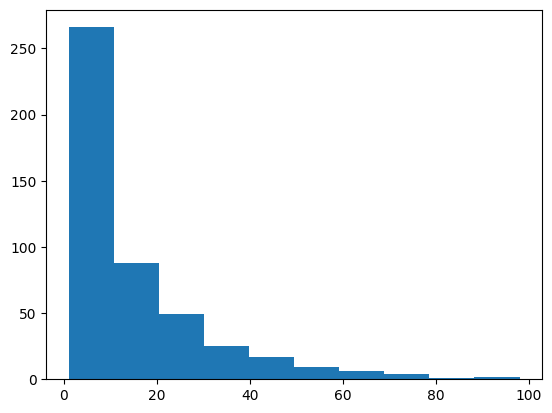

In [105]:
plt.hist(c)

In [106]:
u[ c>3 ].shape

(363,)

In [107]:
allpreds[u[c>31]].shape

(61, 9386, 2)

In [108]:
max_auc = 0
for i in range(100):
    
    filtered_indices = u[c > i]
    if filtered_indices.size == 0:
        print(f"No models left to evaluate at i={i}. Breaking the loop.")
        break
        
    curr_prauc = average_precision_score(tb_df_local_test.tb_positive.values, np.mean( allpreds[u[ c>i ]], axis=0 )[:,1] )
    curr_model_nr = u[ c>i ].shape
    
    if curr_prauc > max_auc: 
        max_auc=curr_prauc
        print(curr_prauc, curr_model_nr, i)

0.952732448242643 (467,) 0
0.9533044192490573 (432,) 1
0.9538097820410166 (396,) 2
0.9542081496177146 (363,) 3
0.9546612728895846 (332,) 4
0.9550434592055991 (301,) 5
0.9553509086044694 (279,) 6
0.9556045988199694 (257,) 7
0.9559540829907427 (233,) 8
0.9561950518647246 (217,) 9
0.9564502581643006 (201,) 10
0.9567120960542977 (190,) 11
0.9567457579014506 (176,) 12
0.9569136117624107 (166,) 13
0.9570199608886677 (154,) 14
0.9570880099483761 (143,) 15
0.9572599176577373 (136,) 16
0.9573365231345218 (131,) 17
0.9574232842402318 (126,) 18
0.9578228330949141 (117,) 19
0.9579189040242061 (113,) 20
0.9580737024404139 (107,) 21
0.9581506399081149 (99,) 23
0.9586302574359792 (92,) 24
0.9586418730036369 (88,) 25
0.9587404482918026 (82,) 26
0.9588506104097867 (75,) 27
0.9589544045992561 (69,) 28
0.9589633442103233 (67,) 29
0.9589761897160644 (64,) 30
No models left to evaluate at i=98. Breaking the loop.


## Submission 25 - MULTI BRANCH - model selection, 64 models

In [109]:
allpreds[u[c>30]].shape

(64, 9386, 2)

In [112]:
allpreds_holdout[u[c>30]].shape

(64, 25027, 2)

In [113]:
final_allpreds = np.mean(allpreds[u[c>30]], axis=0)
final_allpreds.shape

(9386, 2)

In [114]:
final_allpreds_holdout = np.mean(allpreds_holdout[u[c>30]], axis=0)
final_allpreds_holdout.shape

(25027, 2)

In [115]:
(np.argmax(final_allpreds_holdout,1) > 0).sum() / final_allpreds_holdout.shape[0]

0.06337155871658609

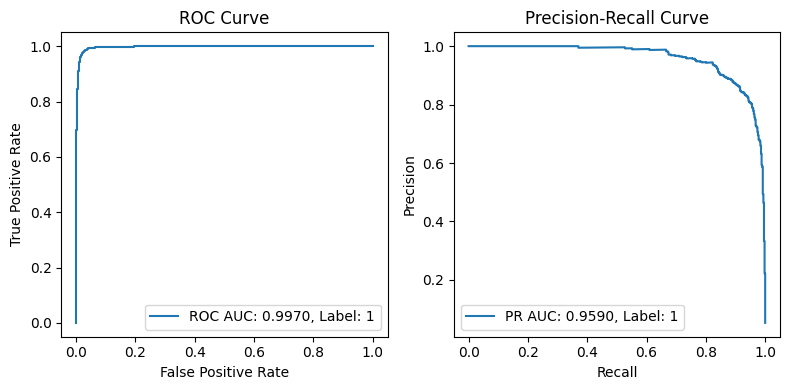

ROC-AUC: 0.996960274415081
PR-AUC:  0.9589761897160644


In [116]:
rocauc, prauc = plot_roc_pr( tb_df_local_test.tb_positive.values, final_allpreds  )
print(f"ROC-AUC: {rocauc}\nPR-AUC:  {prauc}")

In [117]:
tb_df_holdout = pd.read_csv("/home/ngsci/datasets/tb-wellgen-smear/supplementary/contest/tb-holdout-manifest.csv")

prediction_df = tb_df_holdout[["image_id"]].copy()
prediction_df["prob"] = final_allpreds_holdout[:,1]

In [118]:
filepath = "/home/ngsci/project/tuberculosis_detection/submissions/submission_25_preds_64ensemble_small_cls_run_5_uni_cls_run_2_uni_cls_run_4_sqrt_uni_mil_run_1_large_and_uni_cls_run_1_10fold_model_selection_rocauc_0.9969_prauc_0.9589.csv"
prediction_df.to_csv(filepath, index=False, header=False)

In [3]:
filepath = "/home/ngsci/project/tuberculosis_detection/submissions/submission_25_preds_64ensemble_small_cls_run_5_uni_cls_run_2_uni_cls_run_4_sqrt_uni_mil_run_1_large_and_uni_cls_run_1_10fold_model_selection_rocauc_0.9969_prauc_0.9589.csv"

In [4]:
filepath

'/home/ngsci/project/tuberculosis_detection/submissions/submission_25_preds_64ensemble_small_cls_run_5_uni_cls_run_2_uni_cls_run_4_sqrt_uni_mil_run_1_large_and_uni_cls_run_1_10fold_model_selection_rocauc_0.9969_prauc_0.9589.csv'

In [5]:
ngsci.submit_contest_entry(filepath, description="submission 25 dinov2 small-uni-large&uni emb mil-transformer model selection")

(<Result.SUCCESS: 1>, 'Success')